In [2]:
print("notebook working")


notebook working


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Titanic.csv')

print(df.head())

        last               first gender   age  class     fare     embarked  \
0     Braund     Mr. Owen Harris      M  22.0      3   7.2500  Southampton   
1    Cumings   Mrs. John Bradley      F  38.0      1  71.2833    Cherbourg   
2  Heikkinen          Miss Laina      F  26.0      3   7.9250  Southampton   
3   Futrelle  Mrs. Jacques Heath      F  35.0      1  53.1000  Southampton   
4      Allen   Mr. William Henry      M  35.0      3   8.0500  Southampton   

  survived  Unnamed: 8  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0       no         NaN         NaN         NaN         NaN         NaN   
1      yes         NaN         NaN         NaN         NaN         NaN   
2      yes         NaN         NaN  Passengers         NaN  Casualties   
3      yes         NaN         NaN        Male      Female        Male   
4       no         NaN         NaN         577         314         468   

  Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  
0         

In [2]:
# keep only the columns we actually need
df = df[['last', 'first', 'gender', 'age', 'class', 'fare', 'embarked', 'survived']]


print(df.head())

        last               first gender   age  class     fare     embarked  \
0     Braund     Mr. Owen Harris      M  22.0      3   7.2500  Southampton   
1    Cumings   Mrs. John Bradley      F  38.0      1  71.2833    Cherbourg   
2  Heikkinen          Miss Laina      F  26.0      3   7.9250  Southampton   
3   Futrelle  Mrs. Jacques Heath      F  35.0      1  53.1000  Southampton   
4      Allen   Mr. William Henry      M  35.0      3   8.0500  Southampton   

  survived  
0       no  
1      yes  
2      yes  
3      yes  
4       no  


In [5]:
#Change noto 0 and yes to 1
df['survived'] = df['survived'].map({'no': 0, 'yes': 1})

# Check thefirst few rows to make sure it changed
print(df['survived'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: survived, dtype: float64


In [6]:
#Change M to 0 and Fto 1
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

#Check the first few rows
print(df['gender'].head())

0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   last      891 non-null    object 
 1   first     891 non-null    object 
 2   gender    891 non-null    int64  
 3   age       714 non-null    float64
 4   class     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  891 non-null    object 
 7   survived  0 non-null      float64
dtypes: float64(3), int64(2), object(3)
memory usage: 55.8+ KB


In [8]:
print(df['survived'].unique())

[nan]


In [10]:
print(df['survived'].head(10))

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: survived, dtype: float64


In [15]:
#Reload the file just to get that one column back
temp_df = pd.read_csv('titanic.csv')

#Put the original 'yes/no' data back into your working 'df'
df['survived'] = temp_df['survived']

#Check what is actually written there (look for spaces or caps)
print("Raw values in survived column:")
print(df['survived'].unique())

Raw values in survived column:
['no' 'yes']


In [16]:
#Strip any hidden spaces and make it lowercase
df['survived'] = df['survived'].astype(str).str.strip().str.lower()

#Map the words to numbers (1 for yes, 0 for no)
df['survived'] = df['survived'].map({'yes': 1, 'no': 0})

#Final Check: This should now be a number (like 342)
print("Total Survivors Found:", df['survived'].sum())

Total Survivors Found: 342


In [17]:
# 0 = Male, 1 = Female
print("Survival Rate by Gender:")
print(df.groupby('gender')['survived'].mean())

Survival Rate by Gender:
gender
0    0.188908
1    0.742038
Name: survived, dtype: float64


In [18]:
# 1st, 2nd, and 3rd class survival
print("\nSurvival Rate by Class:")
print(df.groupby('class')['survived'].mean())


Survival Rate by Class:
class
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


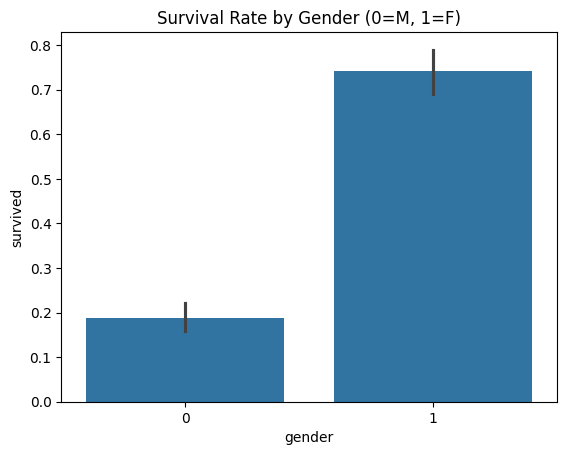

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#bar plot for Gender
sns.barplot(x='gender', y='survived', data=df)
plt.title('Survival Rate by Gender (0=M, 1=F)')
plt.savefig('survival_by_gender.png', dpi=300)
plt.show()

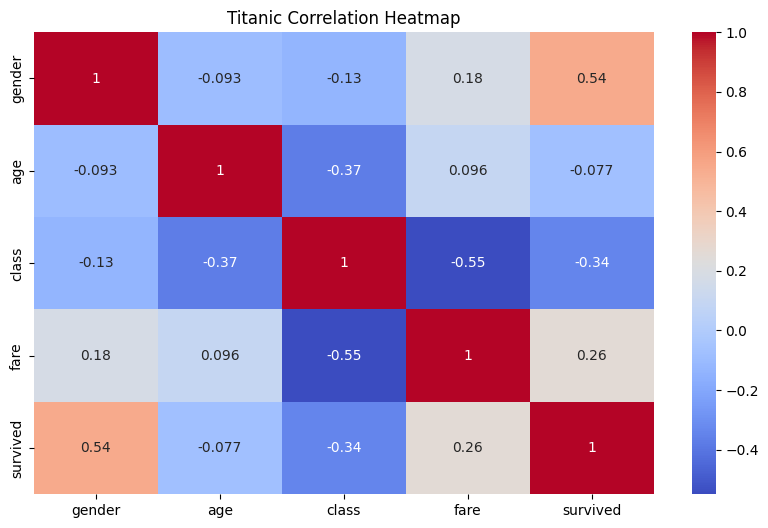

In [23]:
#A heatmap shows how different variables (like Age, Fare, and Class) relate to Survival.
plt.figure(figsize=(10, 6))
# Filter for only numeric columns to avoid errors
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Titanic Correlation Heatmap')
plt.savefig('titanic_heatmap.png', dpi=300)
plt.show()

In [21]:
print("Final Summary Statistics:")
print(df.describe())

Final Summary Statistics:
           gender         age       class        fare    survived
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.352413   29.699118    2.308642   32.204208    0.383838
std      0.477990   14.526497    0.836071   49.693429    0.486592
min      0.000000    0.420000    1.000000    0.000000    0.000000
25%      0.000000   20.125000    2.000000    7.910400    0.000000
50%      0.000000   28.000000    3.000000   14.454200    0.000000
75%      1.000000   38.000000    3.000000   31.000000    1.000000
max      1.000000   80.000000    3.000000  512.329200    1.000000
